In [4]:
import pandas as pd
df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')

First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

Which states have the most sales?
What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
Who is an outstanding customer in New York?
Are there any differences among states in profitability?
The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
What are the Top 20 customers by Sales?
Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

In [60]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [7]:
#NaN values
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [8]:
#Duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


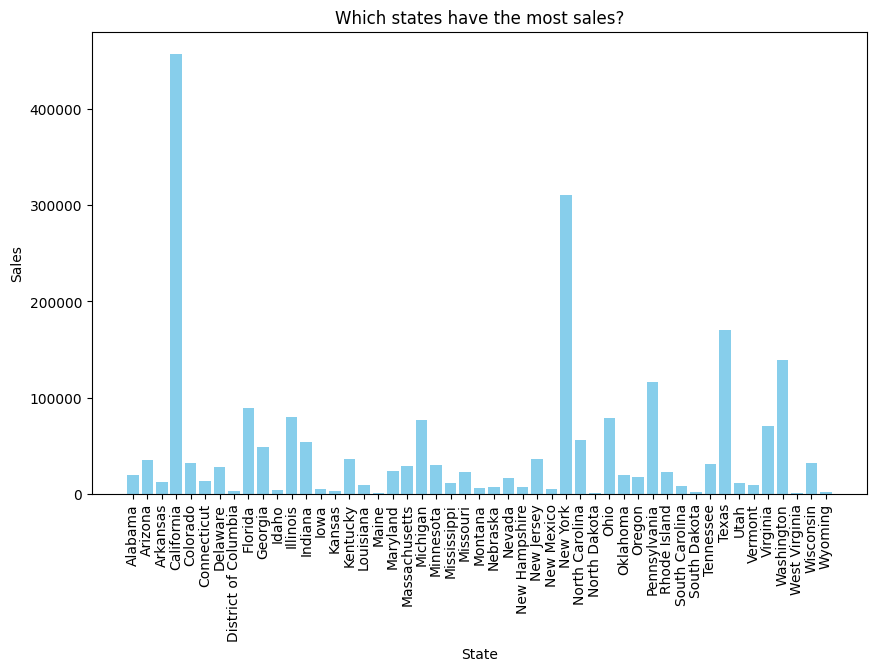

In [25]:
#Which states have the most sales?
import matplotlib.pyplot as plt
state_sales_counts = df.groupby('State')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(state_sales_counts['State'], state_sales_counts['Sales'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Which states have the most sales?')
plt.xticks(rotation=90) 
plt.show()

California has the most sales than other states

In [35]:
# What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
df[['State', 'Sales','Profit']]
states_to_include = ['New York', 'California']
filtered_df = df[df['State'].isin(states_to_include)]
grouped_df = filtered_df[['State', 'Sales', 'Profit']].groupby('State').sum().reset_index()
grouped_df

,State,Sales,Profit
0,California,457687.6315,76381.3871
1,New York,310876.2710,74038.5486


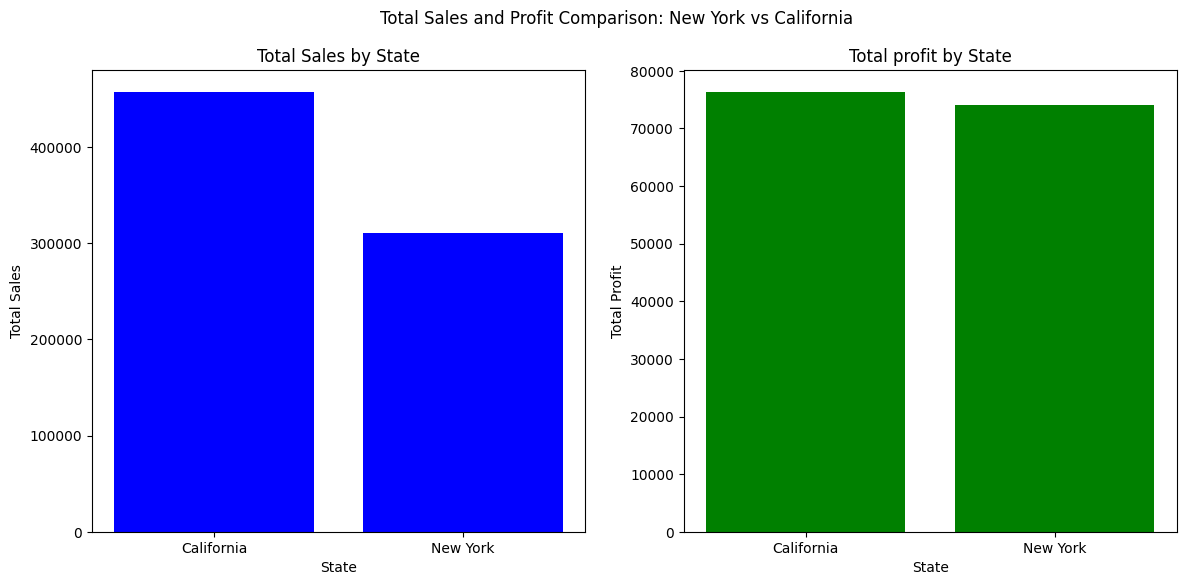

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Plot Sales
ax1.bar(grouped_df['State'], grouped_df['Sales'], color='blue', label='Sales')
ax1.set_xlabel('State')
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales by State')
ax1.tick_params(axis='y')

# Plot Profit
ax2.bar(grouped_df['State'], grouped_df['Profit'], color='green', label='Profit')
ax2.set_xlabel('State')
ax2.set_ylabel('Total Profit')
ax2.set_title('Total profit by State')
ax2.tick_params(axis='x')

plt.suptitle('Total Sales and Profit Comparison: New York vs California')
plt.show()

New York do less Sales than California, but in the end profit approximately the same

In [55]:
# Who is an outstanding customer in New York?
filtered_df = df[df['State'].isin(['New York'])]
grouped_df = filtered_df[['Customer Name', 'Sales']].groupby('Customer Name').sum().reset_index()
outstanding_customer = grouped_df.loc[grouped_df['Sales'].idxmax()]
outstanding_customer

Customer Name    Tom Ashbrook
Sales               13723.498
Name: 399, dtype: object

In [85]:
# Outstanding for each year
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
filtered_df = df[df['State'] == 'New York']
grouped_df = filtered_df.groupby(['Year', 'Customer Name']).agg({'Sales': 'sum'}).reset_index()
outstanding_customers = grouped_df.loc[grouped_df.groupby('Year')['Sales'].idxmax()]
outstanding_customers


,Year,Customer Name,Sales
98,2014,Tom Boeckenhauer,6999.960
191,2015,Peter Fuller,7678.228
301,2016,Karen Daniels,6241.282
510,2017,Tom Ashbrook,13723.498


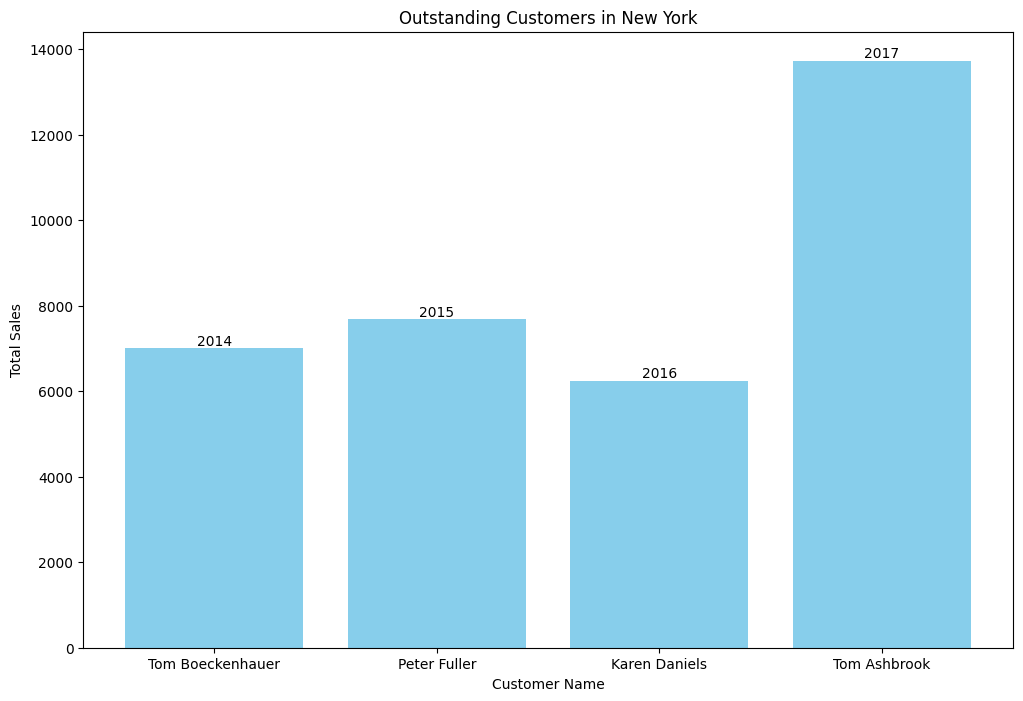

In [88]:
plt.figure(figsize=(12, 8))
bars = plt.bar(outstanding_customers['Customer Name'], outstanding_customers['Sales'], color='skyblue')

plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.title('Outstanding Customers in New York')

# Annotate with years
for bar, year in zip(bars, outstanding_customers['Year']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, year, ha='center', va='bottom')
plt.show()

In [95]:
# Are there any differences among states in profitability?
grouped_df = df[['State', 'Profit']].groupby('State').sum().reset_index()
grouped_df.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


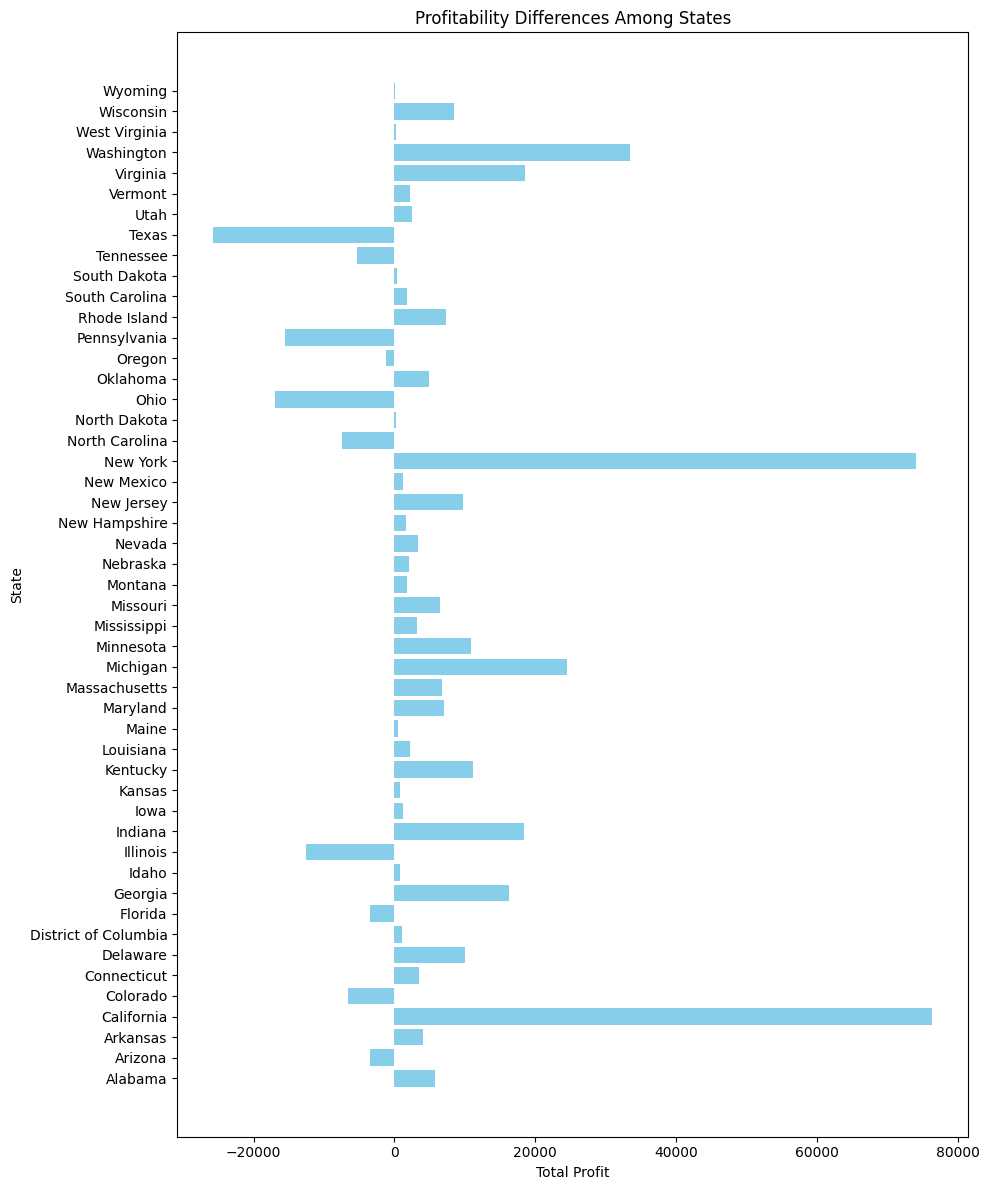

In [94]:
plt.figure(figsize=(10, 12))
plt.barh(grouped_df['State'], grouped_df['Profit'], color='skyblue')
plt.ylabel('State')
plt.xlabel('Total Profit')
plt.title('Profitability Differences Among States')
plt.tight_layout()
plt.show()

In [100]:
#The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the 
#  20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
grouped_df = df[['Customer Name', 'Profit']].groupby('Customer Name').sum().reset_index()
grouped_df.head()

,Customer Name,Profit
0,Aaron Bergman,129.3465
1,Aaron Hawkins,365.2152
2,Aaron Smayling,-253.5746
3,Adam Bellavance,2054.5885
4,Adam Hart,281.1890


In [109]:
profit_80_percent = 0.8 * df['Profit']
profit_80_percent.sum()

229117.61736000003

In [111]:
customer_20_percent = round(df['Customer Name'].nunique() * 0.2)
customer_20_percent

159

In [112]:
total_profit = df.groupby('Customer Name')['Profit'].sum().reset_index()

# Sort customers by total profit (descending order)
sorted_customers = total_profit.sort_values(by='Profit', ascending=False)

print(sorted_customers)

      Customer Name     Profit
730    Tamara Chand  8981.3239
622    Raymond Buch  6976.0959
671    Sanjit Chand  5757.4119
334    Hunter Lopez  5622.4292
6     Adrian Barton  5444.8055
..              ...        ...
329   Henry Goldwyn -2797.9635
693  Sharelle Roach -3333.9144
477     Luke Foster -3583.9770
307  Grant Thornton -4108.6589
165   Cindy Stewart -6626.3895

[793 rows x 2 columns]


In [113]:
# Calculate cumulative profit and cumulative percentage of profit
sorted_customers['Cumulative Profit'] = sorted_customers['Profit'].cumsum()
sorted_customers['Cumulative Percentage of Profit'] = 100 * sorted_customers['Cumulative Profit'] / sorted_customers['Profit'].sum()
sorted_customers

,Customer Name,Profit,Cumulative Profit,Cumulative Percentage of Profit
730,Tamara Chand,8981.3239,8981.3239,3.135970
622,Raymond Buch,6976.0959,15957.4198,5.571783
671,Sanjit Chand,5757.4119,21714.8317,7.582073
334,Hunter Lopez,5622.4292,27337.2609,9.545232
6,Adrian Barton,5444.8055,32782.0664,11.446371
...,...,...,...,...
329,Henry Goldwyn,-2797.9635,304049.9615,106.163800
693,Sharelle Roach,-3333.9144,300716.0471,104.999712
477,Luke Foster,-3583.9770,297132.0701,103.748310
307,Grant Thornton,-4108.6589,293023.4112,102.313708


In [116]:
# Calculate the number of customers making up 20% of the total customer base
top_20_percent_customers_count = int(0.2 * len(sorted_customers))

# Get the top 20% customers
top_20_percent_customers = sorted_customers.head(top_20_percent_customers_count)

# Check if the cumulative percentage of profit for the top 20% customers is close to 80%
top_20_percent_customers_profit_percentage = top_20_percent_customers['Cumulative Percentage of Profit'].iloc[-1]
top_20_percent_customers_profit_percentage

81.42587496747

20% of customers with 81% of profit. So we can apply Pareto principle

In [145]:
#What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? 
#Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
grouped_df = df[['City', 'Sales']].groupby('City').sum().reset_index()
top_sales_df = grouped_df.sort_values(by='Sales', ascending=False).head(20)

grouped_df = df[['City', 'Profit']].groupby('City').sum().reset_index()
top_profit_df = grouped_df.sort_values(by='Profit', ascending=False).head(20)

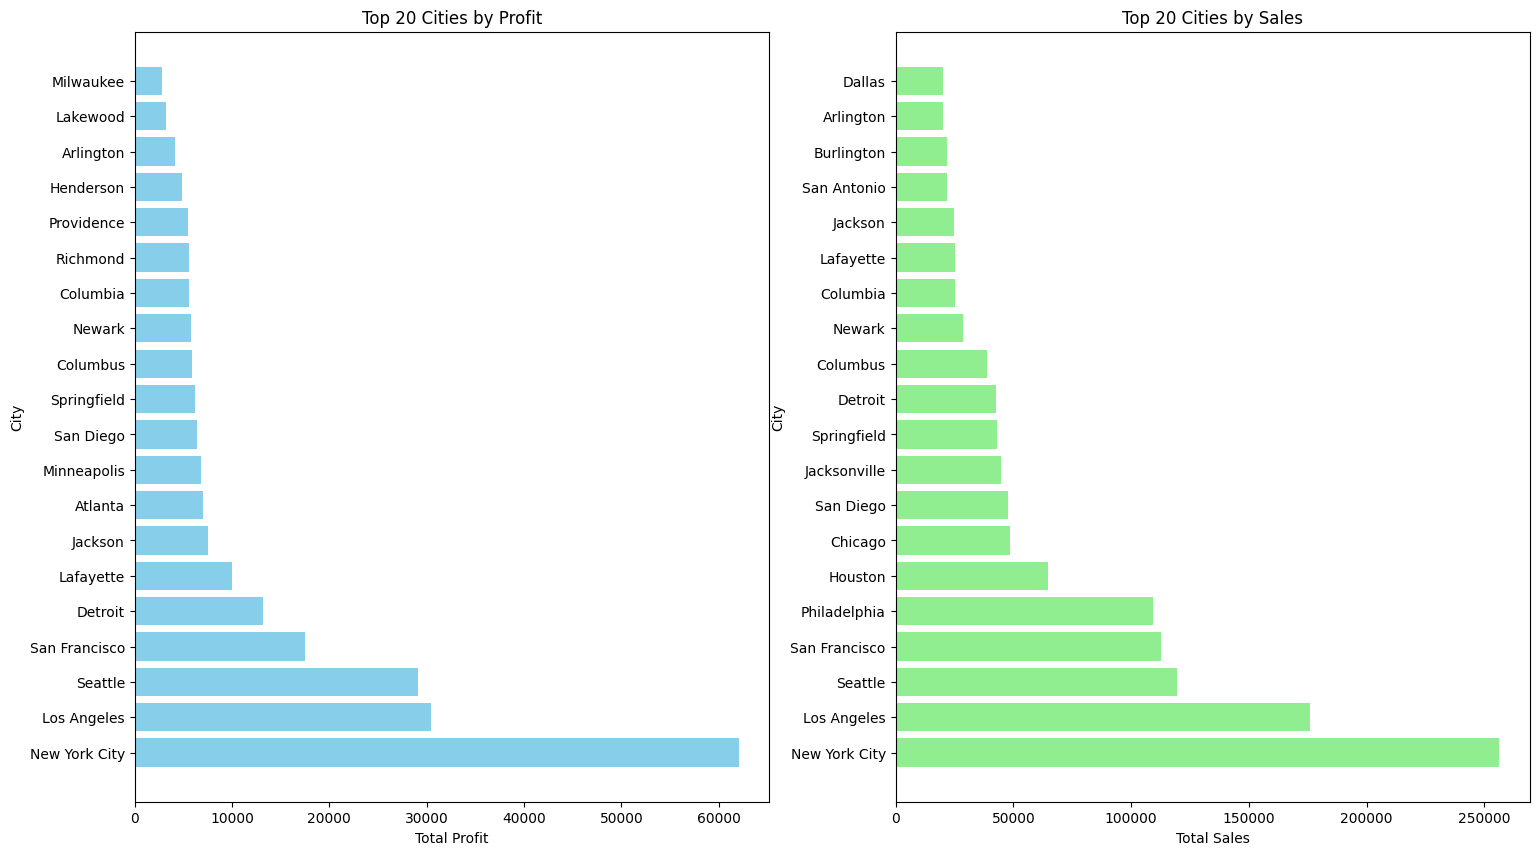

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

axes[0].barh(top_profit_df['City'], top_profit_df['Profit'], color='skyblue')
axes[0].set_title('Top 20 Cities by Profit')
axes[0].set_xlabel('Total Profit')
axes[0].set_ylabel('City')

axes[1].barh(top_sales_df['City'], top_sales_df['Sales'], color='lightgreen')
axes[1].set_title('Top 20 Cities by Sales')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('City')

plt.show()

In [150]:
#What are the Top 20 customers by Sales?
grouped_df = df[['Customer Name', 'Sales']].groupby('Customer Name').sum().reset_index()
top_customer_df = grouped_df.sort_values(by='Sales', ascending=False).head(20)
top_customer_df

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


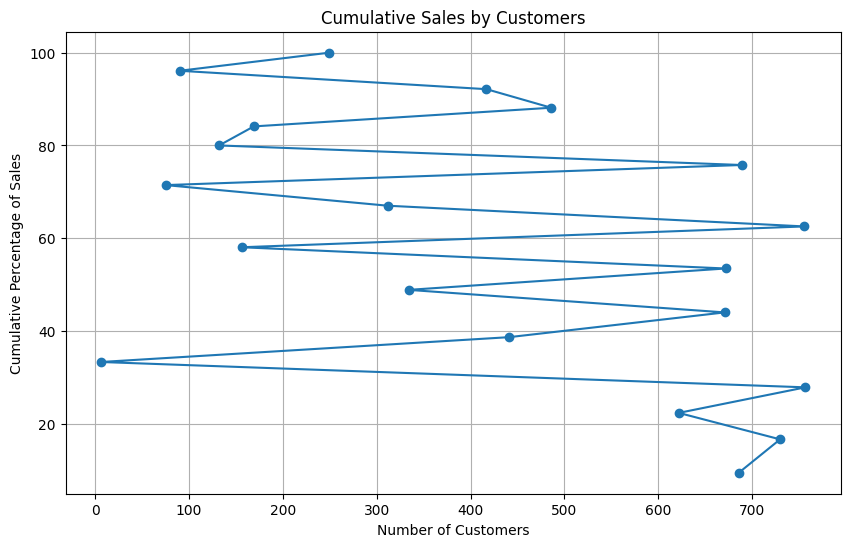

Top 20% of customers contribute to 27.86% of the total sales.


In [152]:
# Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
top_customer_df['Cumulative Sales'] = top_customer_df['Sales'].cumsum()
top_customer_df['Cumulative Percentage of Sales'] = 100 * top_customer_df['Cumulative Sales'] / top_customer_df['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(top_customer_df['Cumulative Percentage of Sales'], marker='o')
plt.title('Cumulative Sales by Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Percentage of Sales')
plt.grid(True)
plt.show()

top_20_percent_customers_count = int(0.2 * len(top_customer_df))

top_20_percent_customers_sales_percentage = top_customer_df['Cumulative Percentage of Sales'].iloc[top_20_percent_customers_count - 1]

print(f"Top 20% of customers contribute to {top_20_percent_customers_sales_percentage:.2f}% of the total sales.")
